<center>

# Newton-Raphson으로 ols 추정

### 미분에 필요한 식은 다음과 같습니다.

</center>

$$
\begin{align}
\\
\quad 
& f(x_i,\beta) = \beta_1 \exp(-\beta_2x_i) \\
\\
& f_{\beta_1} = \exp(-\beta_2x_i) \\
&f_{\beta_2} = -\beta_1x_i\exp(-\beta_2x_i) \\
\\
& f_{\beta_1\beta_1} = 0 \\
& f_{\beta_1\beta_2} = -x_i\exp(-\beta_2x_i)\\
&  f_{\beta_2\beta_1} = -x_i\exp(-\beta_2x_i) \\
& f_{\beta_2\beta_2} = \beta_1x^2_i\exp(-\beta_2x_i) \\
\\
\end{align}
$$

In [1]:
# 계산에 필요한 파이썬 라이브러리 import
import math
import numpy as np
from scipy.linalg import solve

In [2]:
#data x_i, y_i 

x = [0.25,0.5,0.75,1,1.25,2,3,4,5,6,8]
y = [2.05,1.04,0.81,0.39,0.3,0.23,0.13,0.11,0.08,0.1,0.06]

<center>

# 초기 베타값 설정

</center>

$$
\begin{align}
\\
\quad 
& \beta_2 = log(y_1/y_0)/(x_0-x_1)\\
\\
& \beta_1 = y_0/exp(-\beta_2x_0) \quad or \quad  \beta_1 = y_1/exp(-\beta_2x_1)\\
\\
\end{align}
$$

In [3]:
#Beta의 초기값을 설정합니다.
B = []

Beta2 = math.log(y[1]/y[0])/(x[0]-x[1])
Beta1 = y[0]/math.exp(-Beta2*x[0])

# B 는 2*1 vector입니다. Beta1 = 4.04086538, Beta2 = 2.71447632
B.append(np.array([
                               [Beta1],
                               [Beta2]
                                ]))

#반복횟수를 계산하기 위해 0으로 초기값을 줍니다. 
iter_num = 0

In [4]:
# 초기 beta 1 값은 4.04086538, beta 2 값은 2.71447632 입니다. 
B

[array([[4.04086538],
        [2.71447632]])]

<center>
    
### 각 계산에는 다음과 같은 식을 사용하였습니다. 

</center>

$$
\begin{align}
\\
\quad 
&\beta_{(a+1)} = \beta_{(a)} - \{\sum^n_{i=1}l_{\beta\beta}(y_i,\beta(a),\sigma)\}^{-1} \sum^n_{i=1}l_{\beta}(y_i,B(a),\sigma) \\
\\
&  \{\sum^n_{i=1}l_{\beta\beta}(y_i,\beta(a),\sigma)\}^{-1} = \{\sum^n_{i=1} -[f_\beta(x_i,\beta)]^2 +(y_i-f(x_i,\beta))f_{\beta\beta}(x_i,\beta)\}^{-1}
\\
& \sum^n_{i=1}l_{\beta}(y_i,B(a),\sigma) = \sum^n_{i=1} \{y_i - f(x_i,\beta)\} f_\beta (x_i,\beta)
\end{align}
$$

In [5]:
# 루프를 100번 반복합니다. 

for k in range(0,100):
    iter_num += 1
    
    # sum_log_beta와 sum_log_beta_beta는 각각  모든 원소가 0의 값을 가지는 2x1 벡터, 2X2 행렬입니다. (0으로 초기값을 준 것입니다.)
    sum_log_beta = np.zeros((2,1))
    sum_log_beta_beta = np.zeros((2,2))
   
    # 데이터의 수만큼 루프를 반복하며 summation 값을 구합니다. (데이터의 개수가 11개이므로 첫번째 데이터 부터 마지막데이터까지 )
    for i in range(len(x)):
    
            # residual =  y_i - beta1 * exp(-Beta2*x_i)

            residual = y[i]-(B[k][0]*math.exp(-B[k][1]*x[i]))
            
            # f_round_b1 = exp(-Beta2*x_i)
            # f_round_b2 = -Beta1*x_i*exp(-Beta2*x_i)

            f_round_b1 = math.exp(-B[k][1]*x[i])
            f_round_b2 = -(B[k][0]*x[i]*math.exp(-B[k][1]*x[i]))
            
            # f_round_beta는 2*1 vector 입니다. 

            f_round_beta = np.array([
                                            [f_round_b1],
                                            [f_round_b2]
                                            ])
            
            #계산한 값을 sum_log_beta에 더해줍니다. 

            sum_log_beta += residual * f_round_beta
            
            # f round_beta_square는 f_round_beta와 f_round_beta의 transpose를 내적한 값입니다. 

            f_round_beta_square = np.dot( f_round_beta, f_round_beta.T)
            
            # f_round_b1_b1 = 0
            # f_round_b1_b2 = -x_i*exp(-Beta2*x_i)
            # f_round_b2_b1 = -x_i*exp(-Beta2*x_i)
            # f_round_b2_b2 = Beta1*(x_i^2)*exp(-Beta2*x_i)

            f_round_b1_b1 = 0
            f_round_b1_b2 = -x[i]*math.exp(-B[k][1]*x[i])
            f_round_b2_b1 = -x[i]*math.exp(-B[k][1]*x[i])
            f_round_b2_b2 = B[k][0]*(x[i]**2)*math.exp(-B[k][1]*x[i])
            
            # f_round_beta_beta는 2*2 matrix 입니다.

            f_round_beta_beta =  np.array([
                                                             [f_round_b1_b1,f_round_b1_b2],
                                                             [f_round_b2_b1,f_round_b2_b2]
                                                            ])
            
           # 계산한 값을 sum_log_beta_beta에 더해줍니다. 

            sum_log_beta_beta += -f_round_beta_square + (residual * f_round_beta_beta)
        
    # 모든 데이터에 대해 summation 한 값이  sum_log_beta_beta 이므로 행렬의 역행렬을 구해줍니다. 
    inverse_matrix = np.linalg.inv(sum_log_beta_beta)

    # 역행렬과 sum_log_beta를 내적한 값을 K라고 하겠습니다. 따라서 K는 2*1 벡터입니다. 
    K = np.dot(inverse_matrix,sum_log_beta)

    # 원래 베타값에서 K를 빼준 값을 새로운 베타값으로 정의하고 B 리스트에 추가합니다. 
    new_beta = B[k]-K
    B.append(new_beta)
    
    # Beta1과 beta2의 차이 중 큰 수가 10e-8보다 작으면 수렴했다고 가정하고 루프를 멈춥니다.

    if max(abs(B[k+1]-B[k])/B[k]) < 10e-8:
        print("break")
        break
        
print()
print("iter_num = ",iter_num )
print("Beta1 = ",B[k][0][0])
print("Beta2 = ",B[k][1][0])

break

iter_num =  6
Beta1 =  3.297332277471603
Beta2 =  2.0251243069269163


### 베타값이 다음과 같이 변화하였음을 알 수 있습니다. 

In [6]:
# B 리스트에 들어있는 beta1 값과 beta2 값을 각각 다른 리스트에 넣어줍니다. 
change_Beta1_list = [f'{B[k][0][0]}' for k in range(len(B))]
change_Beta2_list = [f'{B[k][1][0]}' for k in range(len(B))]

print("Beta1 값의 변화")
print('-> '.join(change_Beta1_list))
print()

print("Beta2 값의 변화")
print('-> '.join(change_Beta2_list))


Beta1 값의 변화
4.040865384615384-> 2.7936132085687864-> 3.1974707333098524-> 3.2921627066013417-> 3.2973170181409714-> 3.297332277471603-> 3.2973322776098954

Beta2 값의 변화
2.714476319988142-> 1.5759346276043646-> 1.9317311741229952-> 2.0201482947076363-> 2.025109239831671-> 2.0251243069269163-> 2.0251243070674136


### 수렴한 베타값들을 이용하여 그린 그래프는 다음과 같습니다. 

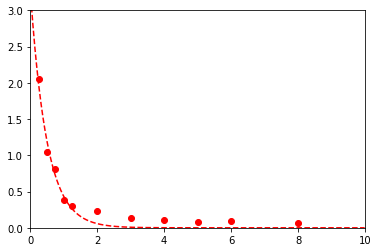

In [8]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro')
plt.axis([0, 10, 0, 3])
t = np.arange(0,10,0.01)

plt.plot(t, ((3.29733228*(math.e**(-2.02512431*t)))), 'r--')
plt.show()